# Introduction

Notebook to aggregate the running of models in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [3]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import tc_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

testcases = fd.Datasets.read_testcases_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [4]:
exp_vol_intersec_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

OracleExpertVolunteers_INTERSEC.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [5]:
evals_df_2.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,sim_threshold,top,trace_links_df
0,lsi,top_10_cosine_0.0,24.29,43.0,31.04,0.0,10.0,Bug_Number 1248267 1248268 1257087 1264988...
1,lsi,top_10_cosine_0.1,24.29,43.0,31.04,0.1,10.0,Bug_Number 1248267 1248268 1257087 1264988...
2,lsi,top_10_cosine_0.2,24.37,43.0,31.10,0.2,10.0,Bug_Number 1248267 1248268 1257087 1264988...
3,lsi,top_10_cosine_0.3,24.39,43.0,31.13,0.3,10.0,Bug_Number 1248267 1248268 1257087 1264988...
4,lsi,top_10_cosine_0.4,24.45,43.0,31.17,0.4,10.0,Bug_Number 1248267 1248268 1257087 1264988...


In [6]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

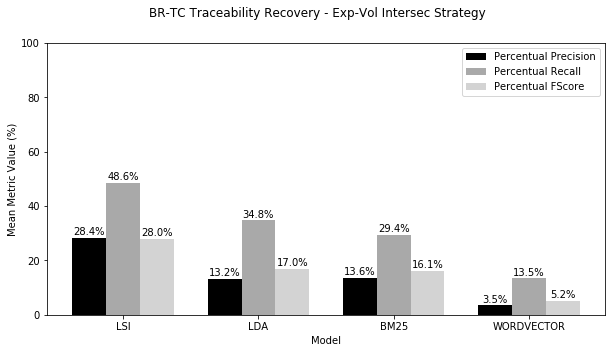

In [7]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-TC Traceability Recovery - Exp-Vol Intersec Strategy')

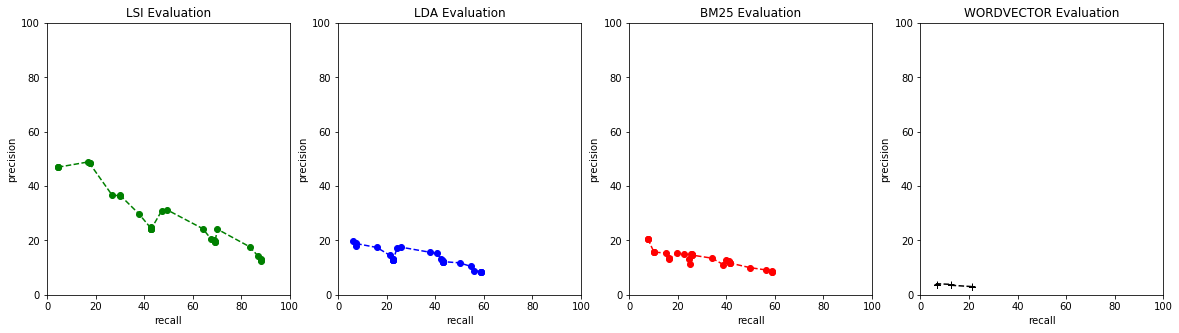

In [8]:
evaluator_2.plot_evaluations_4(evals_df_2)

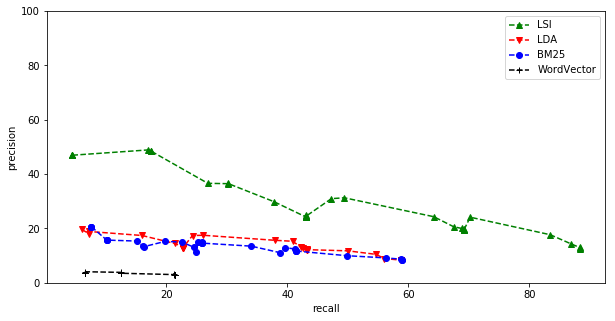

In [9]:
evaluator_2.plot_evaluations_5(evals_df_2)

### Oracle True Traces

In [10]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 514


#### Oracle

In [11]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().head())

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388,1279140,1279143,1279864,1281190,1281493,1282759,1283542,1285041,1285328,1287384,1287687,1287748,1287823,1289240,1289832,1290424,1291770,1292566,1292573,1293308,1294733,1294887,1295502,1296322,1296366,1296861,1297336,1297374,1297686,1297976,1299458,1300738,1301056,1301421,1301784,1302468,1303339,1305195,1305676,1305737,1306639,1309856,1311998,1312018,1313290,1313778,1313969,1314643,1316126,1318903,1319119,1319433,1319919,1320557,1323211,1325902,1328913,1330745,1334844,1335538,1335992,1336227,1337682,1339497,1343256,1344446,1345687,1352539,1353831,1357085,1357458,1365887,1408361,1430603,1432915,1449700,1451475
TC_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0
15,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0
16,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0
17,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0


### Retrieved Traces - Similarity Threshold 0.0

In [12]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.0])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall','fscore']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall,fscore
0,10,0.0,lsi,221,689,293,24.29,43.00,31.04
3,10,0.0,lda,117,793,397,12.86,22.76,16.43
6,10,0.0,bm25,133,778,381,14.60,25.88,18.67
9,10,0.0,wordvector,34,876,480,3.74,6.61,4.78
1,20,0.0,lsi,356,1464,158,19.56,69.26,30.51
4,20,0.0,lda,222,1598,292,12.20,43.19,19.02
7,20,0.0,bm25,213,1609,301,11.69,41.44,18.24
10,20,0.0,wordvector,64,1756,450,3.52,12.45,5.48
2,40,0.0,lsi,454,3186,60,12.47,88.33,21.86
5,40,0.0,lda,302,3338,212,8.30,58.75,14.54


#### Traces Not Captured by Any Technique

In [13]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

details_df_t10 = aux_functions.detail_features_tc_br(not_captured_traces_t10_inter, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

details_df_t20 = aux_functions.detail_features_tc_br(not_captured_traces_t20_inter, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

details_df_t40 = aux_functions.detail_features_tc_br(not_captured_traces_t40_inter, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

TOP 10 --------------------------
len(not_captured_traces): 204
percent not_captured_traces: 204/514 * 100 : 39.69%


,tc,br,br_summary
tc_feat,,,
Browser Customization,5,5,5
Context Menu,59,59,59
Downloads Dropmaker,20,20,20
Indicator for device permissions,12,12,12
New Awesome Bar,100,100,100
PDF Viewer,1,1,1
Zoom Indicator,7,7,7




TOP 20 --------------------------
len(not_captured_traces): 107
percent not_captured_traces: 107/514 * 100 : 20.82%


,tc,br,br_summary
tc_feat,,,
Browser Customization,4,4,4
Context Menu,27,27,27
Downloads Dropmaker,10,10,10
Indicator for device permissions,3,3,3
New Awesome Bar,63,63,63




TOP 40 --------------------------
len(not_captured_traces): 34
percent not_captured_traces: 34/514 * 100 : 6.615%


,tc,br,br_summary
tc_feat,,,
Context Menu,4,4,4
Downloads Dropmaker,3,3,3
New Awesome Bar,27,27,27


##### Missed Traces Detailed

In [21]:
import pandas as pd

lda_model = exp_vol_intersec_strat_runner.get_lda_model()
lsi_model = exp_vol_intersec_strat_runner.get_lsi_model()
bm25_model = exp_vol_intersec_strat_runner.get_bm25_model()

df = pd.DataFrame(columns=['mrw_tcs','mrw_brs'], index=['lda','lsi','bm25'])

lda_mrw_tc, lda_mrw_br = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, lda_model)
df.at['lda','mrw_tcs'] = lda_mrw_tc
df.at['lda','mrw_brs'] = lda_mrw_br

lsi_mrw_tc, lsi_mrw_br = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, lsi_model)
df.at['lsi','mrw_tcs'] = lsi_mrw_tc
df.at['lsi','mrw_brs'] = lsi_mrw_br

bm25_mrw_tc, bm25_mrw_br = aux_functions.get_mrw_traces_set(not_captured_traces_t10_inter, bm25_model)
df.at['bm25','mrw_tcs'] = bm25_mrw_tc
df.at['bm25','mrw_brs'] = bm25_mrw_br

df

,mrw_tcs,mrw_brs
lda,"[(awesom, 91), (bar, 74), (icon, 69), (display, 66), (menu, 61), (context, 59)]","[(tab, 74), (search, 43), (context, 39), (nan, 38), (step, 36), (file, 36)]"
lsi,"[(awesome, 91), (icon, 68), (bar, 68), (menu, 61), (context, 59), (site, 47)]","[(result, 93), (tab, 74), (new, 44), (search, 43), (context, 39), (file, 36)]"
bm25,"[(bar, 112), (display, 98), (open, 96), (page, 88), (launch, 78), (click, 77)]","[(firefox, 193), (open, 146), (bar, 86), (tab, 74), (new, 56), (click, 45)]"


In [ ]:
from collections import Counter

word_list = [w for l in df.mrw_tc.values for w in l]
Counter(word_list).most_common()[0:6]

In [ ]:
from collections import Counter

word_list = [w for l in df.mrw_br.values for w in l]
Counter(word_list).most_common()[0:6]

#### Traces Captured by Every Technique

In [ ]:
print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))

details_df_t10 = aux_functions.detail_features_tc_br(traces_captured_by_all_t10_inter, testcases, bugreports)
display(details_df_t10.groupby('tc_feat').count())

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))

details_df_t20 = aux_functions.detail_features_tc_br(traces_captured_by_all_t20_inter, testcases, bugreports)
display(details_df_t20.groupby('tc_feat').count())

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))

details_df_t40 = aux_functions.detail_features_tc_br(traces_captured_by_all_t40_inter, testcases, bugreports)
display(details_df_t40.groupby('tc_feat').count())

#### Similarity Matrices Analysis

##### **LDA**

In [ ]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix())

##### **LSI**

In [ ]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix())

##### **BM25**

In [ ]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

##### **Word Vector**

In [ ]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

#aux_functions.highlight_df(wv_sim_matrix)

#### LDA Topics

In [ ]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

#### True Positives Analysis

In [ ]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [ ]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

#### False Positives Analysis

In [ ]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

#aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [ ]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP', verbose=False)

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP', verbose=False)

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP', verbose=False)

In [ ]:
df = pd.DataFrame(columns=['top','model','exc_fp_amount','retrieved_traces_amount','percentage'])
df.top = [10,10,10,10,
          20,20,20,20,
          40,40,40,40]
df.model = ['bm25','lsi','lda','wordvector',
            'bm25','lsi','lda','wordvector',
            'bm25','lsi','lda','wordvector']
df.exc_fp_amount = [len(bm25_fp_exc_set_t10),len(lsi_fp_exc_set_t10),len(lda_fp_exc_set_t10),len(wv_fp_exc_set_t10),
                    len(bm25_fp_exc_set_t20),len(lsi_fp_exc_set_t20),len(lda_fp_exc_set_t20),len(wv_fp_exc_set_t20),
                    len(bm25_fp_exc_set_t40),len(lsi_fp_exc_set_t40),len(lda_fp_exc_set_t40),len(wv_fp_exc_set_t40)]
df.retrieved_traces_amount = [910,910,910,910,
                              1820,1820,1820,1820,
                              3640,3640,3640,3640]
df.percentage = df.apply(lambda row : round(row['exc_fp_amount']/row['retrieved_traces_amount'] * 100,2), axis=1)

df

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pointplot(y='FP_amount', x='top', 
              hue='model', 
              col='retrieved', 
              markers=['o','x','^','v'], 
              linestyles=["-","--",":","-."], 
              data=retrieved_traces_df)

##### FP Details

In [ ]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t40, testcases, bugreports)

bm25_t10_fp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fp_amount_by_feat['model'] = 'bm25'
bm25_t40_fp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t40, testcases, bugreports)

lda_t10_fp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fp_amount_by_feat['model'] = 'lda'
lda_t40_fp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t40, testcases, bugreports)

lsi_t10_fp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fp_amount_by_feat['model'] = 'lsi'
lsi_t40_fp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t40, testcases, bugreports)

wv_t10_fp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fp_amount_by_feat['model'] = 'wordvector'
wv_t40_fp_amount_by_feat['model'] = 'wordvector'

In [ ]:
df_t10 = pd.concat([bm25_t10_fp_amount_by_feat, lsi_t10_fp_amount_by_feat,
                   lda_t10_fp_amount_by_feat, wv_t10_fp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FP_amount')
df_t10.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

In [ ]:
df_t40 = pd.concat([bm25_t40_fp_amount_by_feat, lsi_t40_fp_amount_by_feat,
                     lda_t40_fp_amount_by_feat,  wv_t40_fp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FP_amount')
df_t40.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

In [ ]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

#aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')
#aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

In [ ]:
df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_fn_set_t10)
df.at['TOP 20','BM25'] = len(bm25_fn_set_t20)
df.at['TOP 40','BM25'] = len(bm25_fn_set_t40)

df.at['TOP 10','LSI'] = len(lsi_fn_set_t10)
df.at['TOP 20','LSI'] = len(lsi_fn_set_t20)
df.at['TOP 40','LSI'] = len(lsi_fn_set_t40)

df.at['TOP 10','LDA'] = len(lda_fn_set_t10)
df.at['TOP 20','LDA'] = len(lda_fn_set_t20)
df.at['TOP 40','LDA'] = len(lda_fn_set_t40)

df.at['TOP 10','WordVector'] = len(wv_fn_set_t10)
df.at['TOP 20','WordVector'] = len(wv_fn_set_t20)
df.at['TOP 40','WordVector'] = len(wv_fn_set_t40)

print()

df

##### Exclusive Traces

In [ ]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN')

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN')

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN')

##### FN Details

In [ ]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t40, testcases, bugreports)

bm25_t10_fn_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fn_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fn_amount_by_feat['model'] = 'bm25'
bm25_t40_fn_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t40, testcases, bugreports)

lda_t10_fn_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fn_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fn_amount_by_feat['model'] = 'lda'
lda_t40_fn_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t40, testcases, bugreports)

lsi_t10_fn_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fn_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fn_amount_by_feat['model'] = 'lsi'
lsi_t40_fn_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t40, testcases, bugreports)

wv_t10_fn_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fn_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fn_amount_by_feat['model'] = 'wordvector'
wv_t40_fn_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [ ]:
df_t10 = pd.concat([bm25_t10_fn_amount_by_feat,  lsi_t10_fn_amount_by_feat,
                     lda_t10_fn_amount_by_feat, wv_t10_fn_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FN_amount')
df_t10.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (3, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [ ]:
df_t40 = pd.concat([bm25_t40_fn_amount_by_feat, lsi_t40_fn_amount_by_feat,
                     lda_t40_fn_amount_by_feat,  wv_t40_fn_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FN_amount')
df_t40.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

### Retrieved Traces - Similarity Threshold 0.9

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.9])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall','fscore']].head(50)

#### Traces Not Captured by Any Technique

In [ ]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

#### Traces Captured by Every Technique

In [ ]:
import pprint

print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t10_inter)

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t20_inter)

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t40_inter)

#### True Positives Analysis

In [ ]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')

#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_set_t40)

print()

df

##### Exclusive Traces

In [ ]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

##### TP Details

In [ ]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_tp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_tp_exc_set_t40, testcases, bugreports)

bm25_t10_tp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_tp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_tp_amount_by_feat['model'] = 'bm25'
bm25_t40_tp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_tp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_tp_exc_set_t40, testcases, bugreports)

lda_t10_tp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_tp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_tp_amount_by_feat['model'] = 'lda'
lda_t40_tp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_tp_exc_set_t40, testcases, bugreports)

lsi_t10_tp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_tp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_tp_amount_by_feat['model'] = 'lsi'
lsi_t40_tp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_tp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_tp_exc_set_t40, testcases, bugreports)

wv_t10_tp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_tp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_tp_amount_by_feat['model'] = 'wordvector'
wv_t40_tp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [ ]:
df_t10 = pd.concat([bm25_t10_tp_amount_by_feat,  lsi_t10_tp_amount_by_feat,
                     lda_t10_tp_amount_by_feat,   wv_t10_tp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'TP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','TP_amount')
df_t10.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [ ]:
df_t40 = pd.concat([bm25_t40_tp_amount_by_feat, lsi_t40_tp_amount_by_feat,
                     lda_t40_tp_amount_by_feat,  wv_t40_tp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'TP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','TP_amount')
df_t40.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (6, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Positives Analysis

In [ ]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

#aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(20, bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, 'FP')
#print('====================')
#aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [ ]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP')

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP')

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP')

##### FP Details

In [ ]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fp_exc_set_t40, testcases, bugreports)

bm25_t10_fp_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fp_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fp_amount_by_feat['model'] = 'bm25'
bm25_t40_fp_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fp_exc_set_t40, testcases, bugreports)

lda_t10_fp_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fp_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fp_amount_by_feat['model'] = 'lda'
lda_t40_fp_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fp_exc_set_t40, testcases, bugreports)

lsi_t10_fp_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fp_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fp_amount_by_feat['model'] = 'lsi'
lsi_t40_fp_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fp_exc_set_t40, testcases, bugreports)

wv_t10_fp_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fp_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fp_amount_by_feat['model'] = 'wordvector'
wv_t40_fp_amount_by_feat['model'] = 'wordvector'

###### TOP 10

In [ ]:
df_t10 = pd.concat([bm25_t10_fp_amount_by_feat,  lsi_t10_fp_amount_by_feat,
                     lda_t10_fp_amount_by_feat,   wv_t10_fp_amount_by_feat])

df_t10 = df_t10[['tc','model']]
df_t10.reset_index(inplace=True)
df_t10.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t10 = df_t10.pivot('feature','model','FP_amount')
df_t10.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=df_t10, linewidths=.3, annot=True, cmap='GnBu')

###### TOP 40

In [ ]:
df_t40 = pd.concat([bm25_t40_fp_amount_by_feat, lsi_t40_fp_amount_by_feat,
                     lda_t40_fp_amount_by_feat,  wv_t40_fp_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FP_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FP_amount')
df_t40.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

#### False Negatives Analysis

In [ ]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

#print("TOP 10 -----------------------------------")
#aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')

#print("\n\nTOP 40 -----------------------------------")
#aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

##### Exclusive Traces

In [ ]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN', verbose=True)

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN', verbose=True)

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN', verbose=True)

##### FN Details

In [ ]:
df_bm25_t10 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t10, testcases, bugreports)
df_bm25_t40 = aux_functions.detail_features_tc_br(bm25_fn_exc_set_t40, testcases, bugreports)

bm25_t10_fn_amount_by_feat = df_bm25_t10.groupby('tc_feat').count()
bm25_t40_fn_amount_by_feat = df_bm25_t40.groupby('tc_feat').count()
bm25_t10_fn_amount_by_feat['model'] = 'bm25'
bm25_t40_fn_amount_by_feat['model'] = 'bm25'


df_lda_t10 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t10, testcases, bugreports)
df_lda_t40 = aux_functions.detail_features_tc_br(lda_fn_exc_set_t40, testcases, bugreports)

lda_t10_fn_amount_by_feat = df_lda_t10.groupby('tc_feat').count()
lda_t40_fn_amount_by_feat = df_lda_t40.groupby('tc_feat').count()
lda_t10_fn_amount_by_feat['model'] = 'lda'
lda_t40_fn_amount_by_feat['model'] = 'lda'


df_lsi_t10 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t10, testcases, bugreports)
df_lsi_t40 = aux_functions.detail_features_tc_br(lsi_fn_exc_set_t40, testcases, bugreports)

lsi_t10_fn_amount_by_feat = df_lsi_t10.groupby('tc_feat').count()
lsi_t40_fn_amount_by_feat = df_lsi_t40.groupby('tc_feat').count()
lsi_t10_fn_amount_by_feat['model'] = 'lsi'
lsi_t40_fn_amount_by_feat['model'] = 'lsi'


df_wv_t10 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t10, testcases, bugreports)
df_wv_t40 = aux_functions.detail_features_tc_br(wv_fn_exc_set_t40, testcases, bugreports)

wv_t10_fn_amount_by_feat = df_wv_t10.groupby('tc_feat').count()
wv_t40_fn_amount_by_feat = df_wv_t40.groupby('tc_feat').count()
wv_t10_fn_amount_by_feat['model'] = 'wordvector'
wv_t40_fn_amount_by_feat['model'] = 'wordvector'

###### TOP 40

In [ ]:
df_t40 = pd.concat([bm25_t40_fn_amount_by_feat, lsi_t40_fn_amount_by_feat,
                     lda_t40_fn_amount_by_feat,  wv_t40_fn_amount_by_feat])

df_t40 = df_t40[['tc','model']]
df_t40.reset_index(inplace=True)
df_t40.rename(columns={'tc':'FN_amount','tc_feat':'feature'}, inplace=True)
df_t40 = df_t40.pivot('feature','model','FN_amount')
df_t40.head(20)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

a4_dims = (2,2)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(ax=ax, data=df_t40, linewidths=.3, annot=True, cmap='GnBu')

### Recovery Effort Index (REI)

In [ ]:
orc_vol_only_precision = 42.66
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [ ]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

### Goodness Scale

In [ ]:
aux_functions.calculate_goodness(evals_df_2_1)

### Delete Variables

## Volunteers Only Strategy

In [ ]:
vol_strat_runner = tc_br_strat_runner.TC_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
aux_functions.highlight_df(evals_df_4[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-TC Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_vol)))

#### Wrong Traces Exploration

In [ ]:
sample_wrong_traces = set(list(oracle_true_traces_vol - oracle_true_traces_inter)[0:5])
sample_wrong_traces

In [ ]:
aux_functions.detail_features_tc_br(sample_wrong_traces, testcases, bugreports)

In [ ]:
#aux_functions.highlight_ranking_tc_br([br for tc,br in sample_wrong_traces], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)
aux_functions.highlight_ranking_tc_br([1306639], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-TC Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = tc_br_strat_runner.TC_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-TC Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables